In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate 60 days of defect data
np.random.seed(120)
days = pd.date_range(start='2024-01-01', periods=120)
sample_size = np.random.randint(80, 120, size=120)  # daily sample sizes
true_defect_rate = 0.05

# Simulate daily defect counts
defect_count = np.random.binomial(sample_size, true_defect_rate)

df = pd.DataFrame({
    'Date': days,
    'Sample_Size': sample_size,
    'Defects': defect_count
})

df['Defect_Rate'] = df['Defects'] / df['Sample_Size']
print(df.head())

        Date  Sample_Size  Defects  Defect_Rate
0 2024-01-01          119        7     0.058824
1 2024-01-02           80        5     0.062500
2 2024-01-03          110        4     0.036364
3 2024-01-04          111        8     0.072072
4 2024-01-05           90        4     0.044444


In [2]:
df

,Date,Sample_Size,Defects,Defect_Rate
0,2024-01-01,119,7,0.058824
1,2024-01-02,80,5,0.062500
2,2024-01-03,110,4,0.036364
3,2024-01-04,111,8,0.072072
4,2024-01-05,90,4,0.044444
...,...,...,...,...
115,2024-04-25,87,3,0.034483
116,2024-04-26,96,11,0.114583
117,2024-04-27,96,2,0.020833
118,2024-04-28,107,6,0.056075


In [3]:

p_bar =df['Defects'].sum()/df['Sample_Size'].sum()
df['p_bar']=p_bar
df['UCL']=p_bar +3 *np.sqrt((p_bar*(1-p_bar))/df['Sample_Size'])
df['LCL']=p_bar -3 *np.sqrt((p_bar*(1-p_bar))/df['Sample_Size'])
df['LCL']=df['LCL'].clip(lower=0)
df.head()


,Date,Sample_Size,Defects,Defect_Rate,p_bar,UCL,LCL
0,2024-01-01,119,7,0.058824,0.050583,0.110850,0.0
1,2024-01-02,80,5,0.062500,0.050583,0.124087,0.0
2,2024-01-03,110,4,0.036364,0.050583,0.113267,0.0
3,2024-01-04,111,8,0.072072,0.050583,0.112984,0.0
4,2024-01-05,90,4,0.044444,0.050583,0.119883,0.0


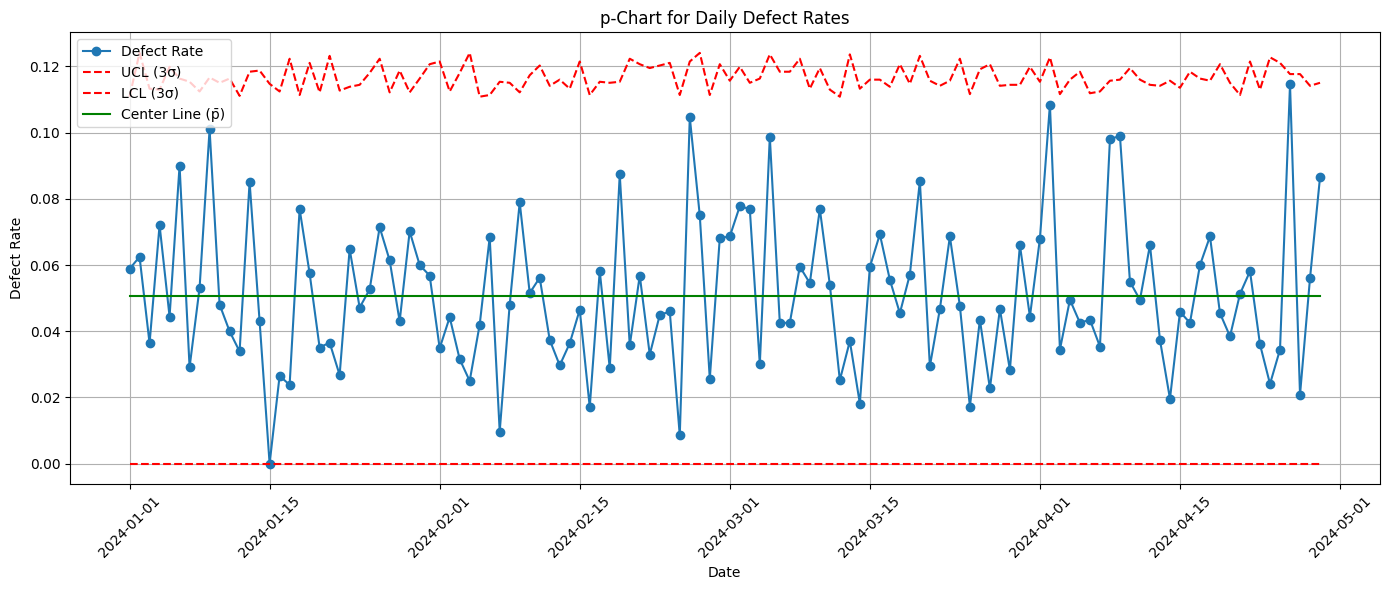

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')
plt.title('p-Chart for Daily Defect Rates')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
df['Out_of_control']=(df['Defect_Rate']<df['LCL']) | (df['Defect_Rate']>df['UCL'])
print(df[df['Out_of_control']][['Date','Defect_Rate','UCL','LCL']])

Empty DataFrame
Columns: [Date, Defect_Rate, UCL, LCL]
Index: []


In [6]:
from statsmodels.stats.proportion import proportions_ztest
last =df.iloc[-1]
count =last['Defects']
nobs=last['Sample_Size']
stat ,pval=proportions_ztest(count,nobs,value=df['p_bar'].iloc[-1],alternative='larger')
print(f"z-stat: {stat:.2f},p-value:{pval:.4f}")
if pval<0.05:
    print("Statistically significant incrase  ")
else:
    print("no significant shift detected")

z-stat: 1.30,p-value:0.0961
no significant shift detected


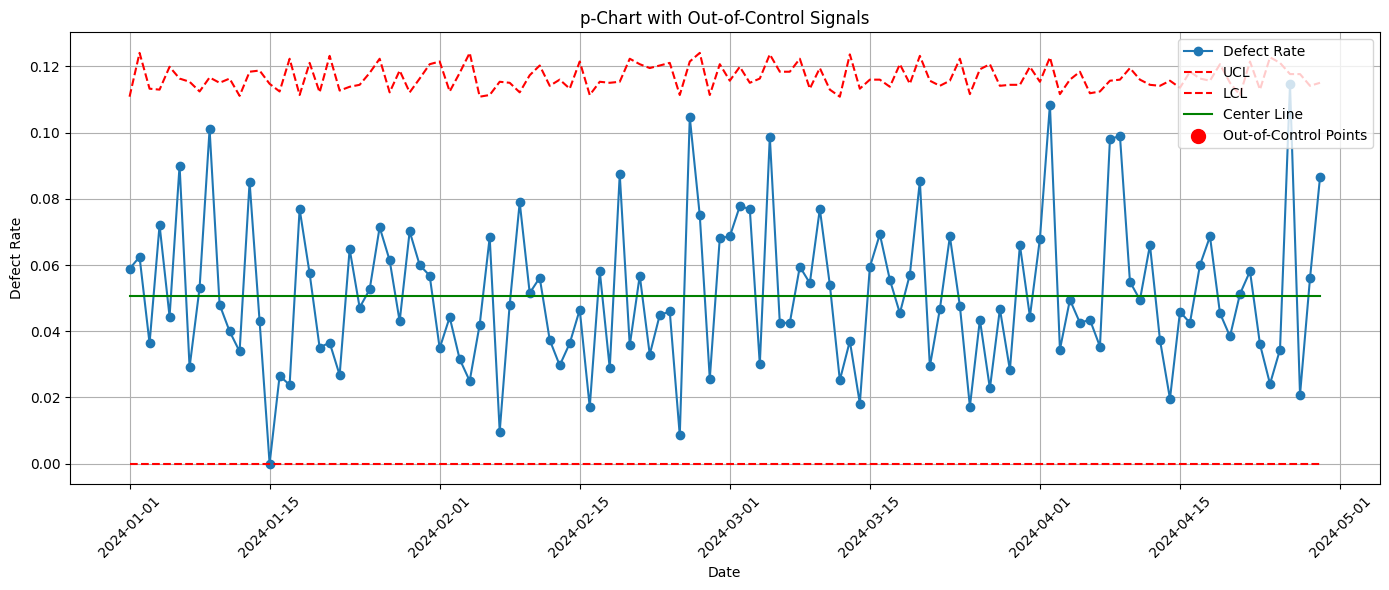

In [7]:
# Mark out-of-control points on the chart
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line')

# Highlight points
out = df[df['Out_of_control']]
plt.scatter(out['Date'], out['Defect_Rate'], color='red', s=100, label='Out-of-Control Points')

plt.title('p-Chart with Out-of-Control Signals')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df.loc[75:,'Defects']=np.random.binomial(df.loc[75:,'Sample_Size'],0.12)
df['Defect_Rate']=df['Defects']/df['Sample_Size']
df.head()

,Date,Sample_Size,Defects,Defect_Rate,p_bar,UCL,LCL,Out_of_control
0,2024-01-01,119,7,0.058824,0.050583,0.110850,0.0,False
1,2024-01-02,80,5,0.062500,0.050583,0.124087,0.0,False
2,2024-01-03,110,4,0.036364,0.050583,0.113267,0.0,False
3,2024-01-04,111,8,0.072072,0.050583,0.112984,0.0,False
4,2024-01-05,90,4,0.044444,0.050583,0.119883,0.0,False


In [10]:
p_bar=df['Defects'].sum()/df['Sample_Size'].sum()
df['p_bar']=p_bar
df['UCL']=p_bar +3 *np.sqrt((p_bar*(1-p_bar))/df['Sample_Size'])
df['LCL']=p_bar -3 *np.sqrt((p_bar*(1-p_bar))/df['Sample_Size'])
df['LCL']=df['LCL'].clip(lower=0)
df.head()

,Date,Sample_Size,Defects,Defect_Rate,p_bar,UCL,LCL,Out_of_control
0,2024-01-01,119,7,0.058824,0.076417,0.149477,0.003357,False
1,2024-01-02,80,5,0.062500,0.076417,0.165523,0.000000,False
2,2024-01-03,110,4,0.036364,0.076417,0.152407,0.000427,False
3,2024-01-04,111,8,0.072072,0.076417,0.152064,0.000770,False
4,2024-01-05,90,4,0.044444,0.076417,0.160427,0.000000,False


In [11]:
df['Out_of_control']=(df['Defect_Rate']<df['LCL']) | (df['Defect_Rate']>df['UCL'])
print(df[df['Out_of_control']][['Date','Defect_Rate','UCL','LCL']])

          Date  Defect_Rate       UCL       LCL
78  2024-03-19     0.161905  0.154195  0.000000
96  2024-04-06     0.156522  0.150736  0.002097
103 2024-04-13     0.158879  0.153465  0.000000
106 2024-04-16     0.159574  0.158620  0.000000


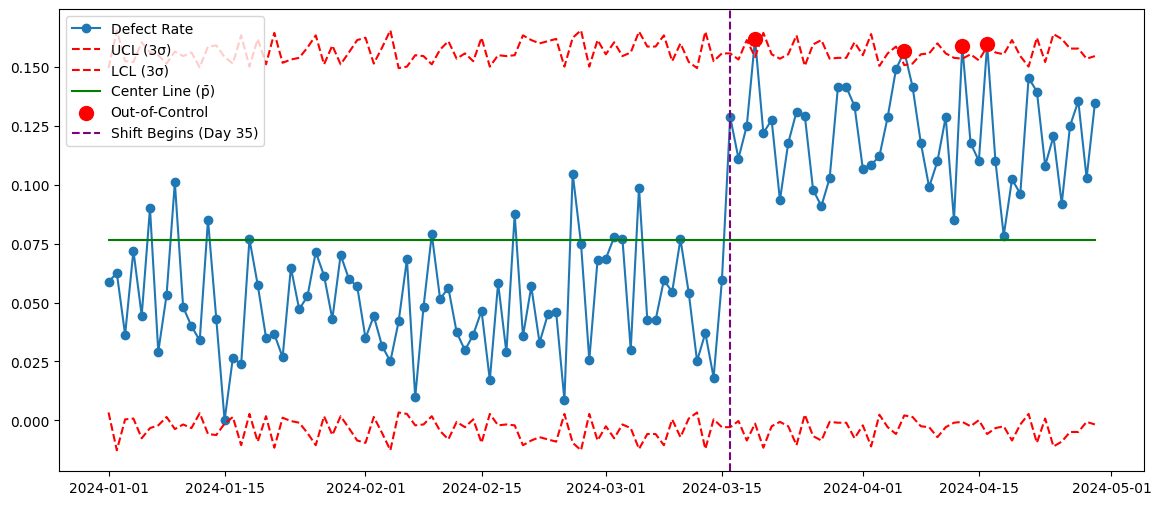

In [13]:
p_bar = df['Defects'].sum() / df['Sample_Size'].sum()
df['p_bar'] = p_bar
df['UCL'] = p_bar + 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['LCL'] = p_bar - 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['UCL'] = df['UCL'].clip(lower=0)

df['Out_of_Control'] = (df['Defect_Rate'] > df['UCL']) | (df['Defect_Rate'] < df['LCL'])
out_points = df[df['Out_of_Control']]

first_shift_index = 75
first_out_after_shift = df.loc[first_shift_index:].query("Out_of_Control").head(1)

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')
plt.scatter(out_points['Date'], out_points['Defect_Rate'], color='red', s=100, zorder=5, label='Out-of-Control')
plt.axvline(df['Date'].iloc[first_shift_index], color='purple', linestyle='--', label='Shift Begins (Day 35)')
plt.legend()
plt.show()

In [14]:
df['sigma']=np.sqrt((df['p_bar']*(1-df['p_bar']))/df['Sample_Size'])
df['Upper_1sigma']=df['p_bar']+df['sigma']
df['Lower_1sigma']=df['p_bar']-df['sigma']
df['Upper_2sigma']=df['p_bar']+2*df['sigma']
df['Lower_2sigma']=df['p_bar']-2*df['sigma']

df['Rule1'] = (df['Defect_Rate'] > df['UCL']) | (df['Defect_Rate'] < df['LCL'])

rule2_flags = [False] * len(df)
for i in range(2, len(df)):
    upper = (df.loc[i-2:i, 'Defect_Rate'] > df.loc[i-2:i, 'Upper_2sigma']).sum()
    lower = (df.loc[i-2:i, 'Defect_Rate'] < df.loc[i-2:i, 'Lower_2sigma']).sum()
    rule2_flags[i] = (upper >= 2) or (lower >= 2)
df['Rule2'] = rule2_flags
df['Above_center'] = df['Defect_Rate'] > df['p_bar']
run_lengths = [1]
for i in range(1, len(df)):
    if df.loc[i, 'Above_center'] == df.loc[i - 1, 'Above_center']:
        run_lengths.append(run_lengths[-1] + 1)
    else:
        run_lengths.append(1)
df['Run_Length'] = run_lengths
df['Rule4'] = df['Run_Length'] >= 8
df['Any_Rule_Violation']=df[['Rule1','Rule2','Rule4']].any(axis=1)
violations=df[df['Any_Rule_Violation']]
print(violations[['Date','Defect_Rate','Rule1','Rule2','Rule4']])

          Date  Defect_Rate  Rule1  Rule2  Rule4
25  2024-01-26     0.071429  False  False   True
26  2024-01-27     0.061404  False  False   True
27  2024-01-28     0.043011  False  False   True
28  2024-01-29     0.070175  False  False   True
29  2024-01-30     0.060000  False  False   True
30  2024-01-31     0.056818  False  False   True
31  2024-02-01     0.034884  False  False   True
32  2024-02-02     0.044248  False  False   True
33  2024-02-03     0.031579  False  False   True
34  2024-02-04     0.025000  False  False   True
35  2024-02-05     0.042017  False  False   True
36  2024-02-06     0.068376  False  False   True
37  2024-02-07     0.009709  False  False   True
38  2024-02-08     0.048077  False  False   True
47  2024-02-17     0.058252  False  False   True
48  2024-02-18     0.028846  False  False   True
73  2024-03-14     0.018182  False   True  False
78  2024-03-19     0.161905   True  False  False
82  2024-03-23     0.117647  False  False   True
83  2024-03-24     0

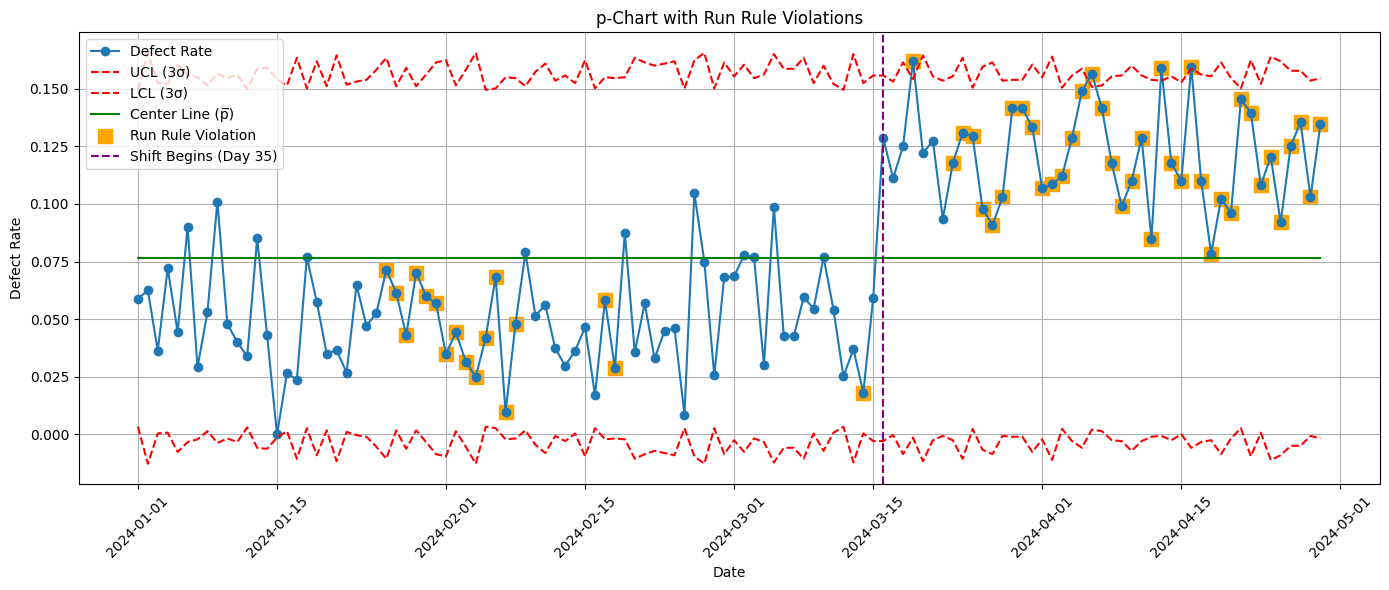

In [16]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̅)')

plt.scatter(violations['Date'], violations['Defect_Rate'],
            color='orange', s=100, marker='s', label='Run Rule Violation')

plt.axvline(df['Date'].iloc[75], color='purple', linestyle='--', label='Shift Begins (Day 35)')

plt.title('p-Chart with Run Rule Violations')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
LSL=0.02
USL=0.08
process_sigma=df['Defect_Rate'].std()

sigma=df['Defect_Rate'].std()
Cp=(USL-LSL)/(6*sigma)
Cpk=min((USL-p_bar)/(3*sigma),(p_bar-LSL)/(3*sigma))
print(f"Cp: {Cp:.2f}, Cpk: {Cpk:.2f}")

Cp: 0.25, Cpk: 0.03


In [18]:
boot_means = [np.mean(np.random.choice(df['Defect_Rate'], size=len(df), replace=True)) for _ in range(1000)]
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

print(f"95% CI for average defect rate: ({ci_lower:.4f}, {ci_upper:.4f})")

95% CI for average defect rate: (0.0692, 0.0835)


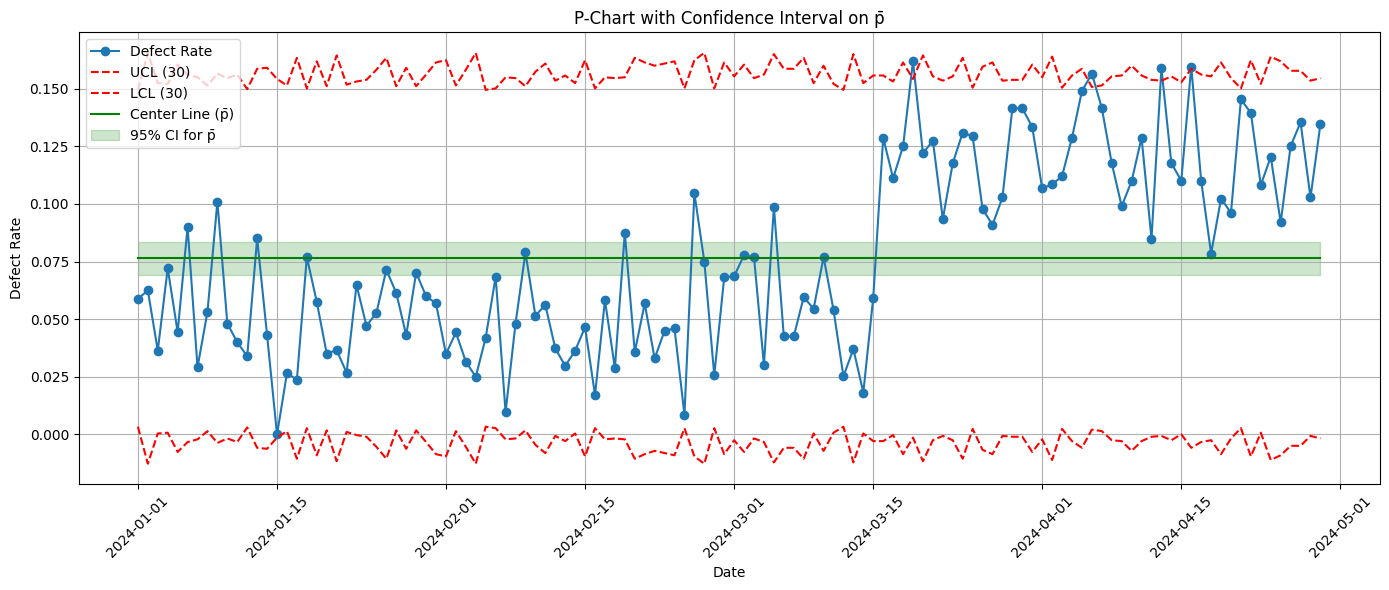

In [19]:
# Existing chart
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (30)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (30)')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')

# Add this for confidence interval shading
plt.fill_between(
    df['Date'], ci_lower, ci_upper,
    color='green', alpha=0.2, label='95% CI for p̄'
)

# Finalize chart
plt.title('P-Chart with Confidence Interval on p̄')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

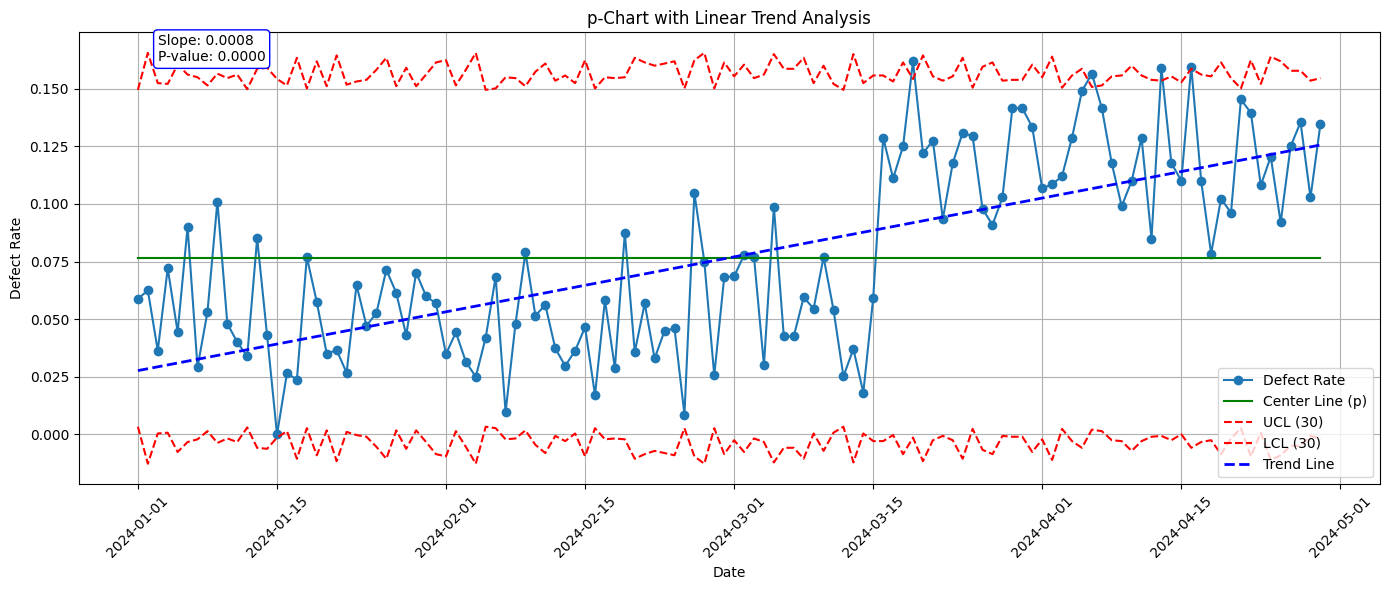

In [20]:
from scipy.stats import linregress
# Step 1: Create a numeric "Day" column

df['Day'] = range(1, len (df) + 1)
# Step 2: Run Linear regression on defect rate over time
trend_result = linregress (df['Day'], df [ 'Defect_Rate'])

slope = trend_result.slope
p_value = trend_result.pvalue
intercept = trend_result.intercept
df ['Trend_Line'] = intercept + slope*df['Day']

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df ['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df ['p_bar'], linestyle='-', color='green', label='Center Line (p)')
plt.plot(df['Date'], df ['UCL'], linestyle='--', color='red', label='UCL (30)')
plt.plot(df['Date'], df ['LCL'], linestyle='--', color='red', label='LCL (30)')
plt.plot(df['Date'], df ['Trend_Line'], linestyle='--', color='blue', linewidth=2, label='Trend Line')

plt.text(df['Date'].iloc[2], max(df ['Defect_Rate']),
           f"Slope: {slope:.4f}\nP-value: {p_value:.4f}",
           fontsize=10, bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round'))


plt.title('p-Chart with Linear Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

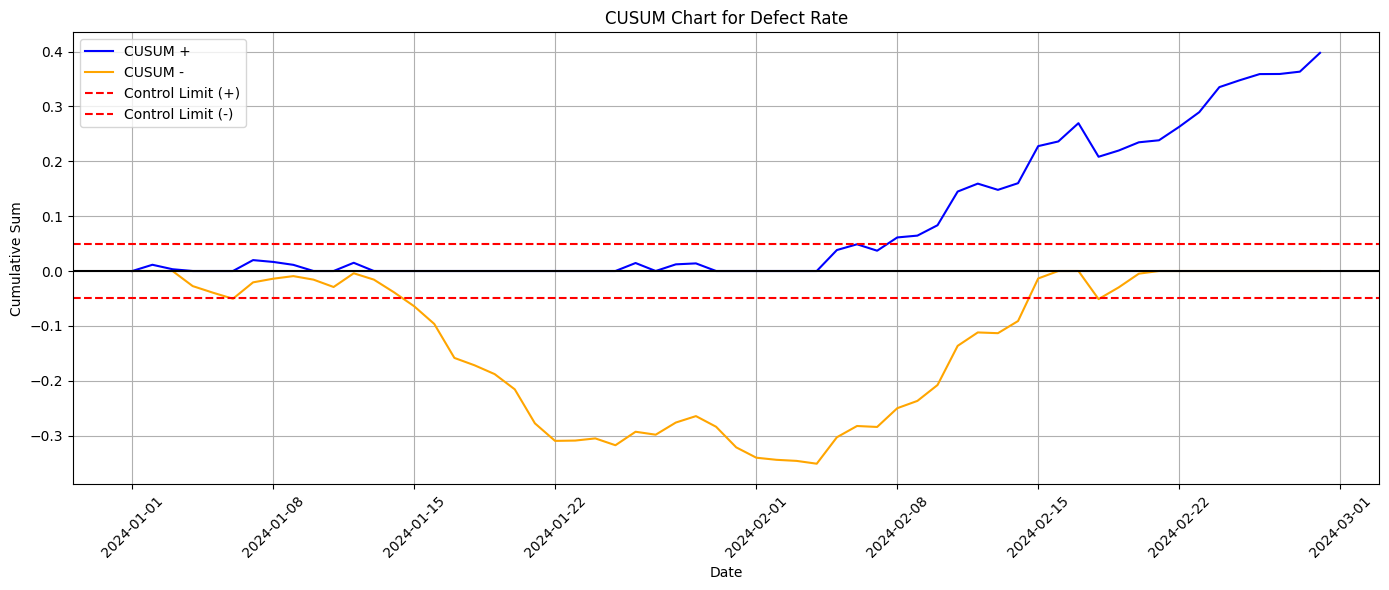

In [ ]:

target = df['Defect_Rate'].mean()
k = 0.005
h = 0.05
cusum_pos = [0]
cusum_neg = [0]

for i in range(1, len(df)):
    p_i = df.loc[i, 'Defect_Rate']
    s_pos = max(0, cusum_pos[-1] + (p_i - target - k))
    s_neg = min(0, cusum_neg[-1] + (p_i - target + k))
    cusum_pos.append(s_pos)
    cusum_neg.append(s_neg)
df['CUMSUM_POS'] = cusum_pos
df['CUMSUM_NEG'] = cusum_neg

plt.figure(figsize=(14, 6))
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['CUMSUM_POS'], label='CUSUM +', color='blue')
plt.plot(df['Date'], df['CUMSUM_NEG'], label='CUSUM -', color='orange')
plt.axhline(h, color='red', linestyle='--', label='Control Limit (+)')
plt.axhline(-h, color='red', linestyle='--', label='Control Limit (-)')
plt.axhline(0, color='black', linestyle='-')
plt.title('CUSUM Chart for Defect Rate')
plt.xlabel('Date')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

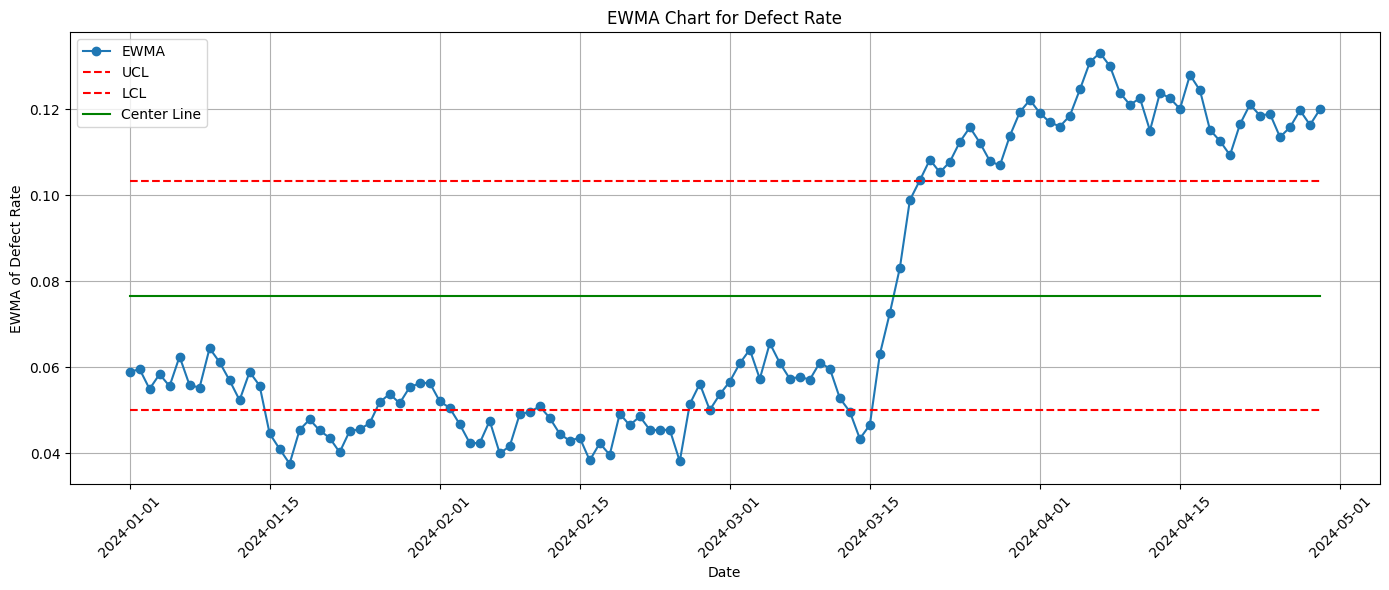

In [21]:

lambda_ = 0.2
L = 3
df['EWMA'] = 0.3
df.loc[0, 'EWMA'] = df.loc[0, 'Defect_Rate']
for i in range(1, len(df)):
    df.loc[i, 'EWMA'] = lambda_ * df.loc[i, 'Defect_Rate'] + (1 - lambda_) * df.loc[i - 1, 'EWMA']
p_bar = df['Defect_Rate'].mean()
avg_n = df['Sample_Size'].mean()
sigma = np.sqrt((p_bar * (1 - p_bar)) / avg_n)

df['UCL_EWMA'] = p_bar + L * sigma * np.sqrt(lambda_ / (2 - lambda_))
df['LCL_EWMA'] = p_bar - L * sigma * np.sqrt(lambda_ / (2 - lambda_))
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['EWMA'], marker='o', label='EWMA')
plt.plot(df['Date'], df['UCL_EWMA'], linestyle='--', color='red', label='UCL')
plt.plot(df['Date'], df['LCL_EWMA'], linestyle='--', color='red', label='LCL')
plt.plot(df['Date'], [p_bar] * len(df), color='green', linestyle='-', label='Center Line')
plt.title('EWMA Chart for Defect Rate')
plt.xlabel('Date')
plt.ylabel('EWMA of Defect Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

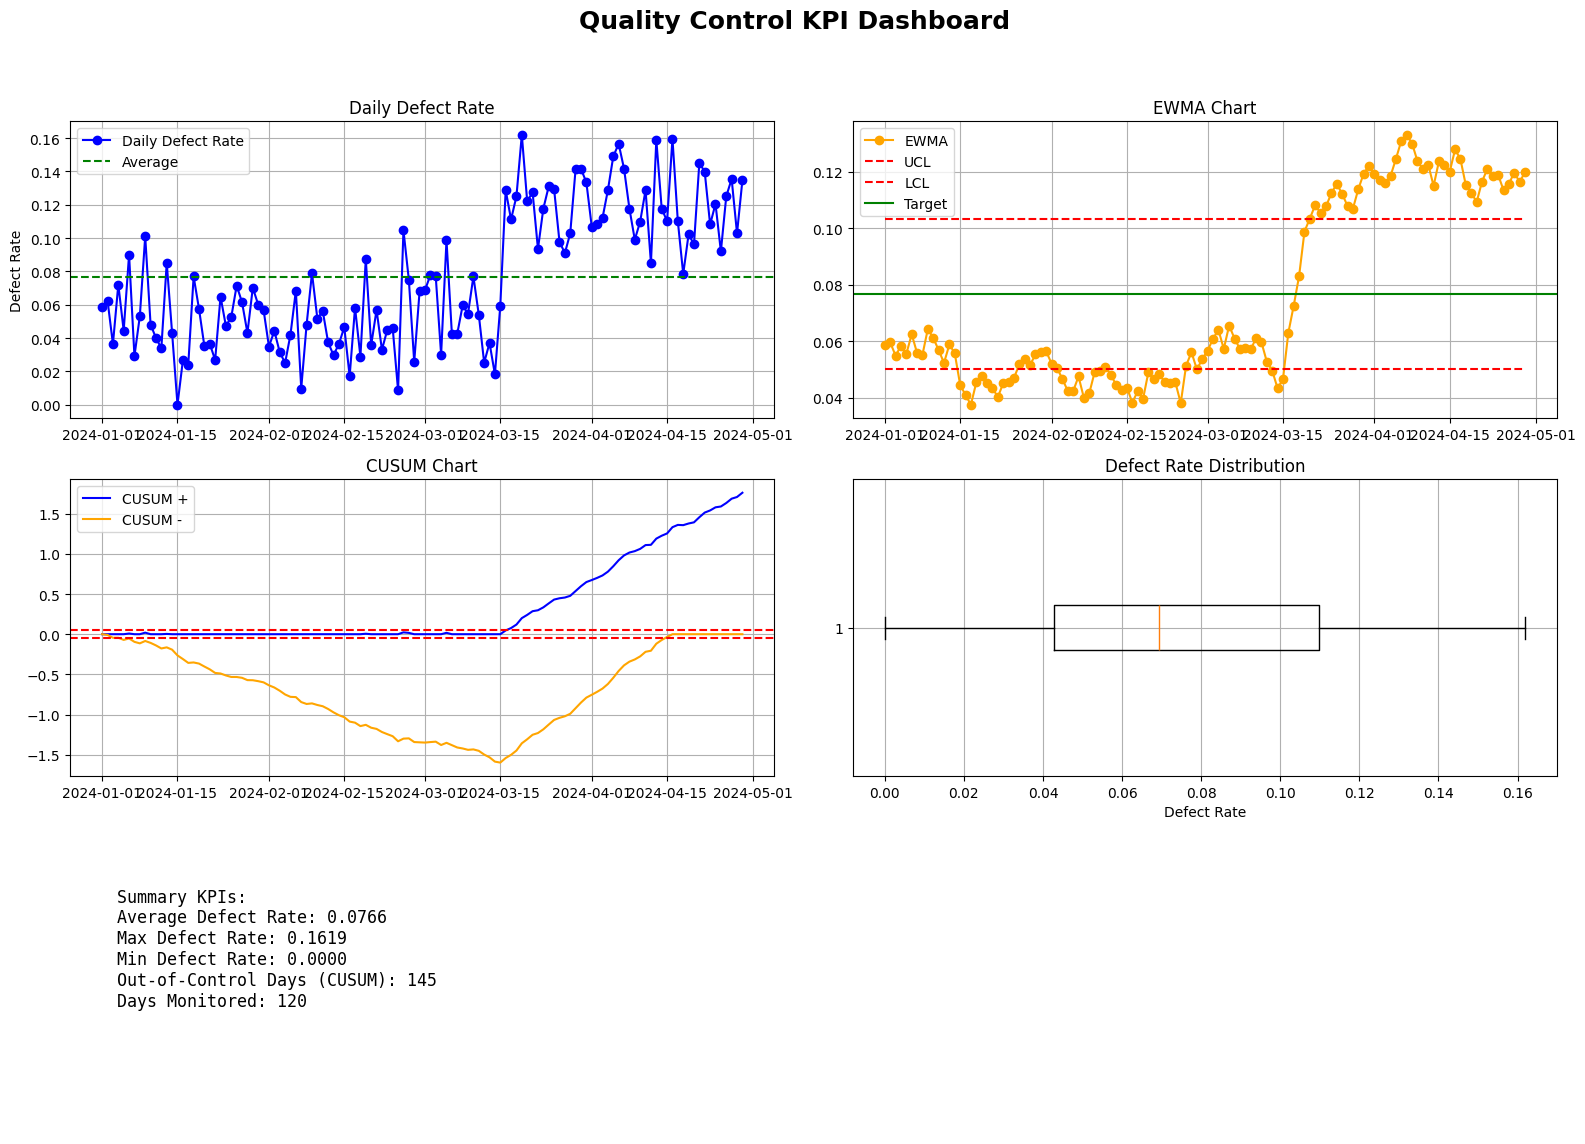

In [23]:
from scipy.stats import linregress

# Calculate CUSUM values and add them to the dataframe
target = df['Defect_Rate'].mean()
k = 0.005
h = 0.05
cusum_pos = [0]
cusum_neg = [0]

for i in range(1, len(df)):
    p_i = df.loc[i, 'Defect_Rate']
    s_pos = max(0, cusum_pos[-1] + (p_i - target - k))
    s_neg = min(0, cusum_neg[-1] + (p_i - target + k))
    cusum_pos.append(s_pos)
    cusum_neg.append(s_neg)
df['CUMSUM_POS'] = cusum_pos
df['CUMSUM_NEG'] = cusum_neg


avg_defect_rate = df['Defect_Rate'].mean()
max_defect_rate = df['Defect_Rate'].max()
min_defect_rate = df['Defect_Rate'].min()
out_of_control_days = (df['CUMSUM_POS'] > 0.05).sum() + (df['CUMSUM_NEG'] < -0.05).sum()

fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Quality Control KPI Dashboard', fontsize=18, fontweight='bold')

axs[0, 0].plot(df['Date'], df['Defect_Rate'], marker='o', color='blue', label='Daily Defect Rate')
axs[0, 0].axhline(avg_defect_rate, color='green', linestyle='--', label='Average')
axs[0, 0].set_title('Daily Defect Rate')
axs[0, 0].set_ylabel('Defect Rate')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 1].plot(df['Date'], df['EWMA'], marker='o', label='EWMA', color='orange')
axs[0, 1].plot(df['Date'], df['UCL_EWMA'], linestyle='--', color='red', label='UCL')
axs[0, 1].plot(df['Date'], df['LCL_EWMA'], linestyle='--', color='red', label='LCL')

axs[0, 1].axhline(avg_defect_rate, color='green', linestyle='-', label='Target')
axs[0, 1].set_title('EWMA Chart')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[1, 0].plot(df['Date'], df['CUMSUM_POS'], label='CUSUM +', color='blue')
axs[1, 0].plot(df['Date'], df['CUMSUM_NEG'], label='CUSUM -', color='orange')
axs[1, 0].axhline(0.05, color='red', linestyle='--')
axs[1, 0].axhline(-0.05, color='red', linestyle='--')
axs[1, 0].set_title('CUSUM Chart')
axs[1, 0].grid(True)
axs[1, 0].legend()
axs[1, 1].boxplot(df['Defect_Rate'], vert=False)
axs[1, 1].set_title('Defect Rate Distribution')
axs[1, 1].set_xlabel('Defect Rate')
axs[1,1].grid(True)
axs[2, 0].axis('off')
kpi_text = f"""
    Summary KPIs:
    Average Defect Rate: {avg_defect_rate:.4f}
    Max Defect Rate: {max_defect_rate:.4f}
    Min Defect Rate: {min_defect_rate:.4f}
    Out-of-Control Days (CUSUM): {out_of_control_days}
    Days Monitored: {len(df)}
    """


axs[2, 0].text(0.01, 0.9, kpi_text, fontsize=12, verticalalignment='top', family='monospace')
axs[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()